In [1]:
# from sklearn.datasets.samples_generator import make_blobs
import scipy.io
import csv
import os
import numpy as np
import random as rn
import operator

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math as m
import matplotlib.ticker as ticker

In [2]:
#Reference:
#   https://support.10xgenomics.com/single-cell/software/pipelines/latest/output/matrices
#   On how to process single cell output matrice on python

genome = "hg19"
matrices_dir = "../PCA/filtered_gene_bc_matrices"
human_matrix_dir = os.path.join(matrices_dir, genome)
mat = scipy.io.mmread(os.path.join(human_matrix_dir, "matrix.mtx"))

genes_path = os.path.join(human_matrix_dir, "genes.tsv")
gene_ids = np.array([row[0] for row in csv.reader(open(genes_path), delimiter="\t")])
gene_names = np.array([row[1] for row in csv.reader(open(genes_path), delimiter="\t")])
gene_ids_names = np.matrix([row for row in csv.reader(open(genes_path), delimiter="\t")])

barcodes_path = os.path.join(human_matrix_dir, "barcodes.tsv")
barcodes = np.array([row[0] for row in csv.reader(open(barcodes_path), delimiter="\t")])

In [56]:
print mat.shape
print gene_ids.shape
print gene_names.shape
print barcodes.shape


(32738, 2700)
(32738,)
(32738,)
(2700,)


In [5]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.random_projection import sparse_random_matrix
global_pca_components = {}
global_list_of_touples =[]

In [13]:
def plot_pca_weights(pca, component = 0):
    shape = pca.components_.shape
    components = shape[0]    
    number_of_features = shape[1]
    principal_components = {}
    for x in range(components):
        unsorted_features = {k: pca.components_[x][k] for k in range(number_of_features)}
        sorted_features = sorted(unsorted_features.items(), key=operator.itemgetter(1), reverse=True)
        principal_components.setdefault("PCA {}".format(x+1), sorted_features)

    assign_global_pca(principal_components)
   
#     print number_of_features
    list_of_components = []

    for i in range(components):
        temp_dict = principal_components["PCA {}".format(i+1)]
        list_of_components.append([temp_dict[j] for j in range(10)])

    assign_global_touples(list_of_components)
    
#     v1 = pca.components_[0]
#     rows = np.argsort(v1)
    
#     s = np.dot(v1, mat.todense()).squeeze()
#     print s.shape
#     columns = np.argsort(s).squeeze()
#     print columns.shape
#     print rows.shape
#     print c
#     print columns[0,:][:].shape
#     columns = [c for c in columns[0]]
#     heat_mat = mat.todense()[rows[:100],:][:,columns[:100]]
#     print heat_mat.shape

#     fig, ax = plt.subplots()
#     ax.imshow(heat_mat)
#     plt.show()
# #     print v1

    for t in range(components):
        tags = [list_of_components[t][k][0] for k in range(10)]
        weights = [list_of_components[t][k][1] for k in range(10)]
        
        tags = get_tags(tags)

        plt.rcdefaults()
        fig, ax = plt.subplots()
        figure = ax.get_figure()
        figure.set_size_inches((4,4))

        y_pos = np.arange(len(tags))
        ax.barh(y_pos, weights, align='center',
                color='green', ecolor='black')
        ax.set_yticks(y_pos)
        ax.set_yticklabels(tags)
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel('Density')
        ax.set_title('PCA {} (+)'.format(t+1))


        list_of_neg_components = []
        for i in range(components):
            temp_dict = principal_components["PCA {}".format(i+1)]
            list_of_neg_components.append([temp_dict[-(j+1)] for j in range(10)])
        
        neg_weights = [list_of_neg_components[t][k][1] for k in range(10)]
        neg_tags = [list_of_neg_components[t][k][0] for k in range(10)]
        neg_tags = get_tags(neg_tags)


        fi, a = plt.subplots()
        figure = a.get_figure()
        figure.set_size_inches((4,4))
        y_neg = np.arange(len(neg_tags))
        a.barh(y_neg, neg_weights, align='center',
                color='red', ecolor='black')
        a.set_yticks(y_neg)
        a.set_yticklabels(neg_tags)
        a.invert_yaxis()  # labels read top-to-bottom
        a.set_xlabel('Density')
        a.set_title('PCA {} (-)'.format(t+1))
        plt.show()

    

def assign_global_pca(dictionary):
    global global_pca_components
    global_pca_components = dictionary 

def assign_global_touples(list_of_components):
    global global_list_of_touples
    global_list_of_touples = list_of_components


In [9]:
def run_pca(matrix_data, components = 10, svd_solver='randomized'):
    X_mat = matrix_data.todense()
    X_mat = X_mat.transpose()
    pca = PCA(copy=True, iterated_power='auto', n_components=components, random_state=None,
              svd_solver=svd_solver, tol=0.0, whiten=False)
    pca.fit(X_mat)
    plot_pca_weights(pca)


    return np.dot(X_mat, pca.components_.transpose())


def get_tags(list_of_indexes):
    tags = []
    for tag in list_of_indexes:
        tags.append(gene_names[tag])
    return tags

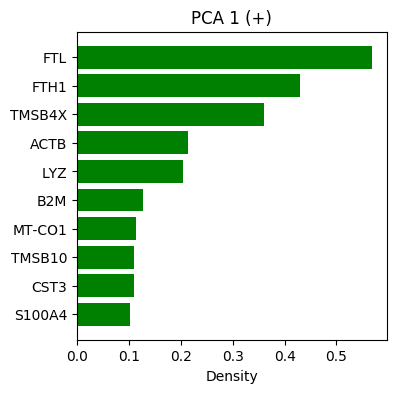

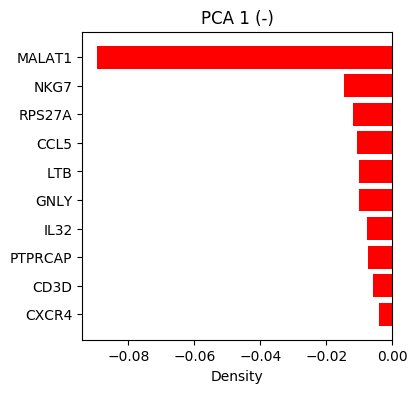

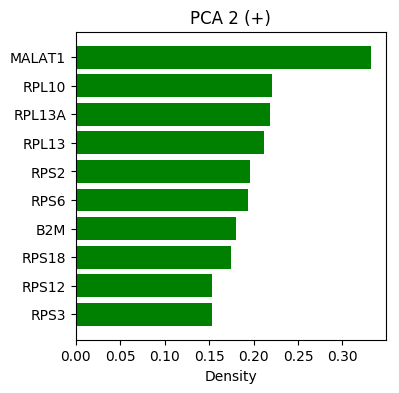

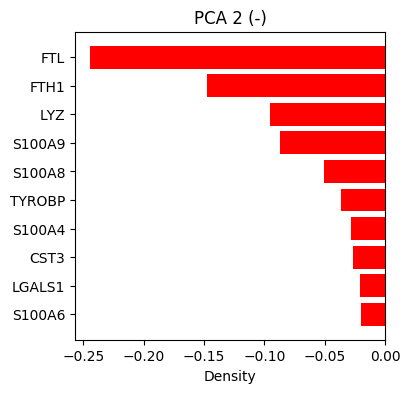

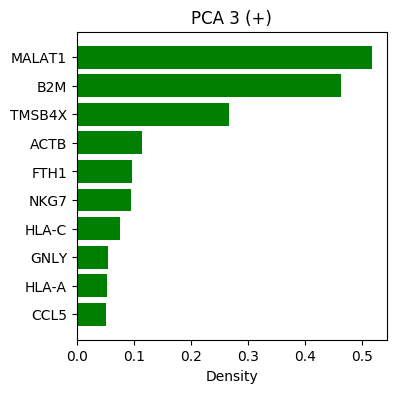

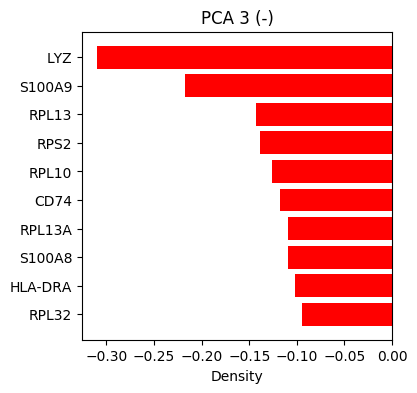

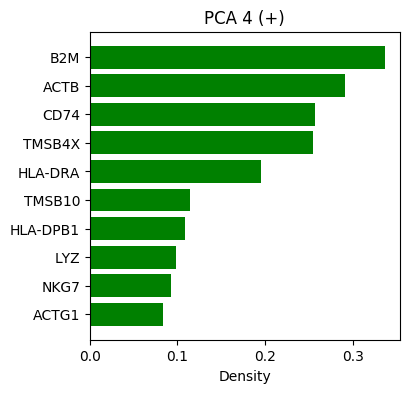

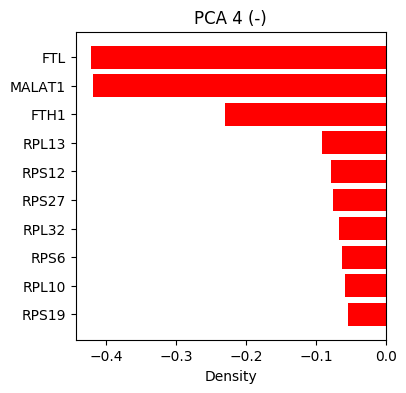

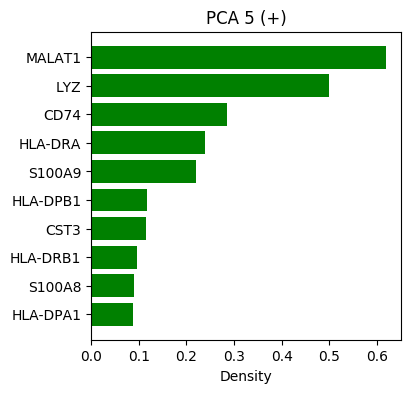

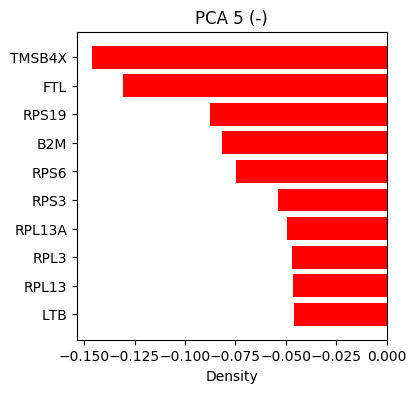

In [14]:
X_mat_red = run_pca(matrix_data = mat, components= 5)

In [15]:
def plot_reduced_matrices(X_mat):
    samples, components = X_mat.shape
    offset = 1
    for i in range(components):
        for j in range(components):
            if j <= i : 
                continue
            else:
                fig, ax = plt.subplots()
                scale_C1 = preprocessing.scale(np.array(X_mat_red[:,i]))
                scale_C2 = preprocessing.scale(np.array(X_mat_red[:,j]))
                ax.scatter(scale_C1, scale_C2)
                ax.set_xlabel("PCA {}".format(i+1))
                ax.set_ylabel("PCA {}".format(j+1))
                ax.set_title("PCA {} vs. PCA {}".format(i+1, j+1))
                plt.show()


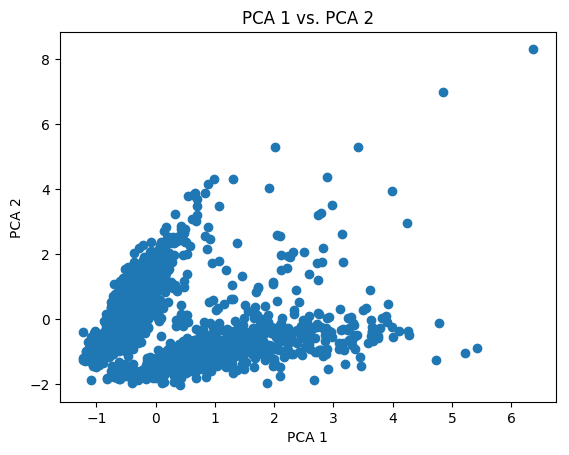

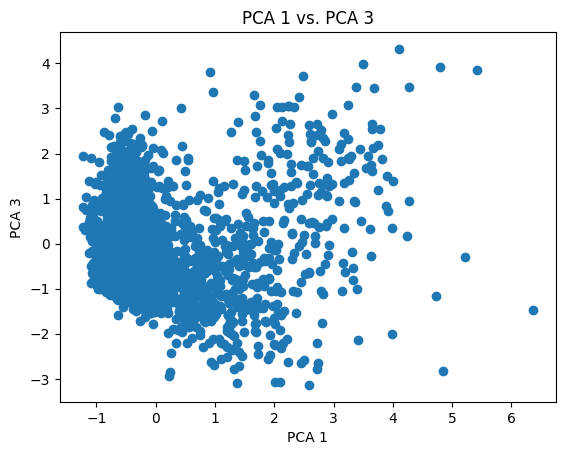

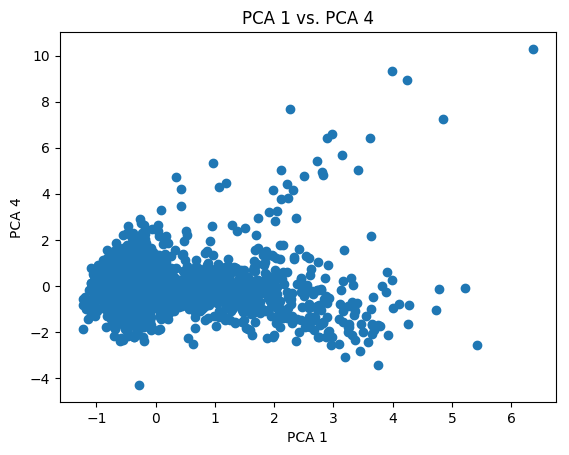

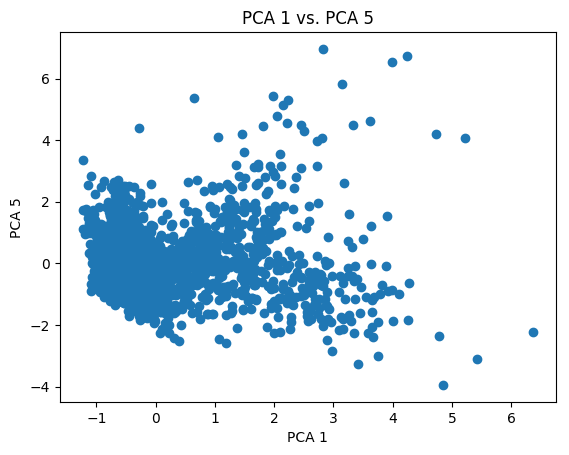

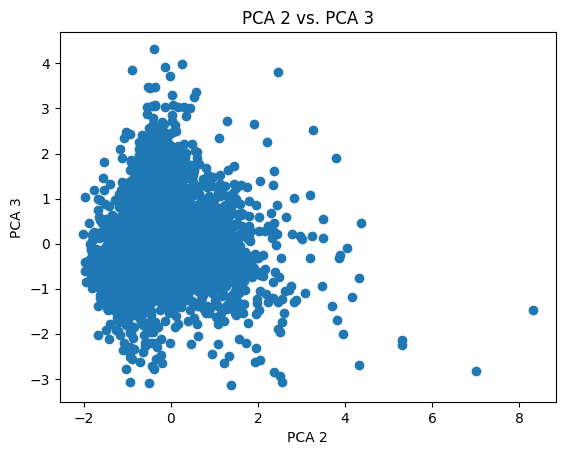

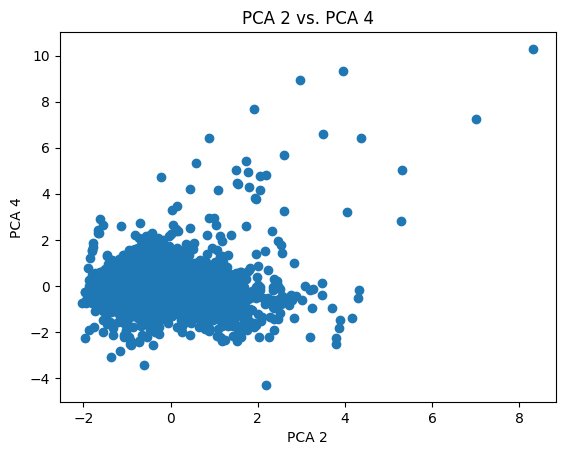

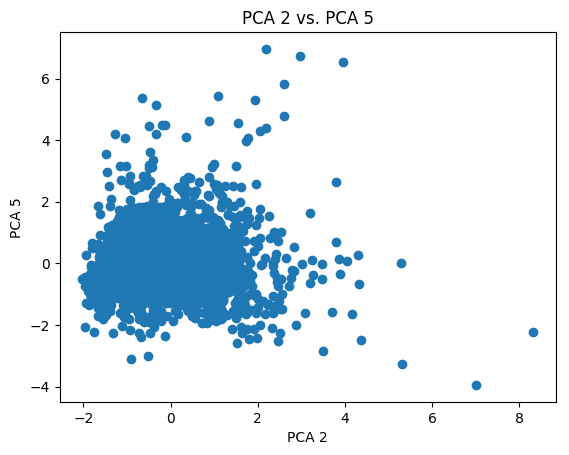

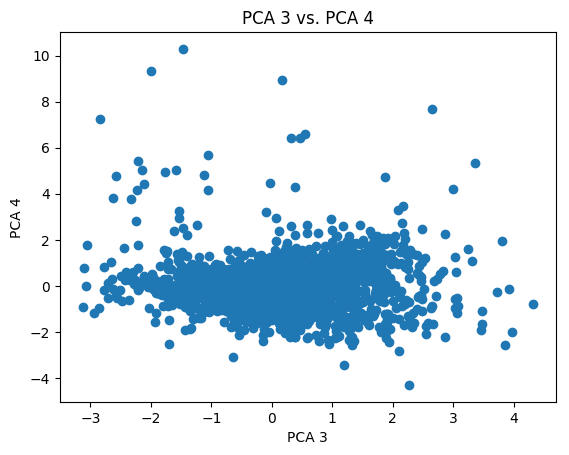

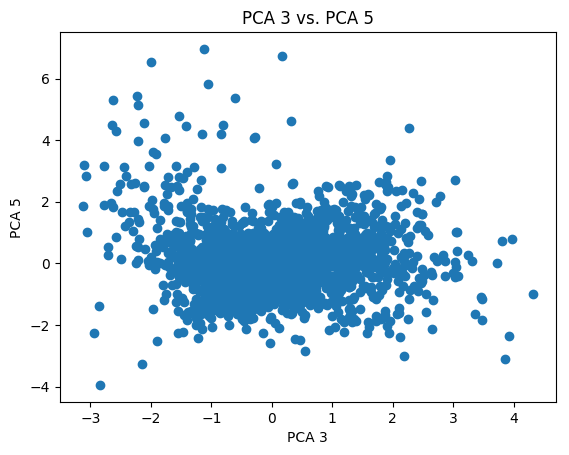

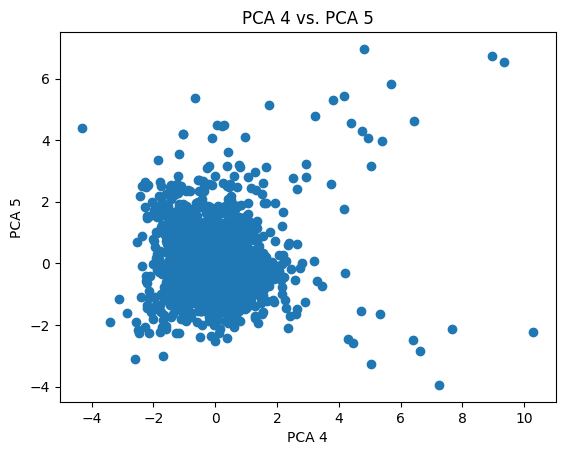

In [237]:
# print X_mat_red.shape
plot_reduced_matrices(X_mat_red)

In [42]:
from sklearn.manifold import TSNE
X = X_mat_red
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
model.fit_transform(X) 


array([[ -0.48289686,  -2.20881253],
       [ -3.81383178,  -5.65985753],
       [-12.29276149,  -3.88825427],
       ..., 
       [ -7.84590549,  13.26701202],
       [  0.73192823,  -5.53765   ],
       [ 10.73212893,   9.60692877]])

In [20]:
model.embedding_

array([[ -0.48289686,  -2.20881253],
       [ -3.81383178,  -5.65985753],
       [-12.29276149,  -3.88825427],
       ..., 
       [ -7.84590549,  13.26701202],
       [  0.73192823,  -5.53765   ],
       [ 10.73212893,   9.60692877]])

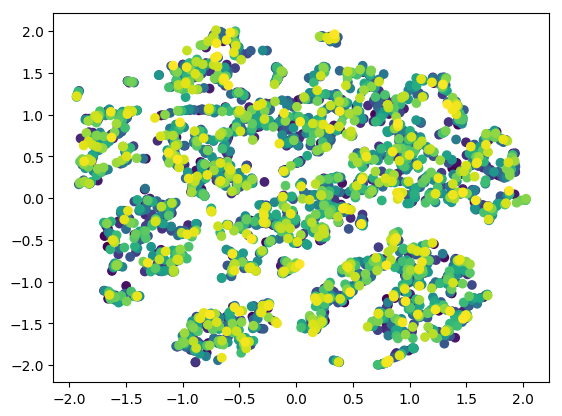

In [79]:

fig, ax = plt.subplots()
marker = matplotlib.lines.Line2D.markers.keys()
#tags, color = list("bgrcmyk")
cols = {}
color = []
count = 0
for c in [x[:2] for x in barcodes]:
    if c in cols:
        color.append(cols[c])
    else:
        cols[c] = count
        color.append(count)
        count += 1
#_, color = np.unique([x[:2] for x in barcodes], return_index=True)
scale_C1 = preprocessing.scale(model.embedding_[:, 0])
scale_C2 = preprocessing.scale(model.embedding_[:, 1])
ax.scatter(scale_C1, scale_C2, c=color)
plt.show()


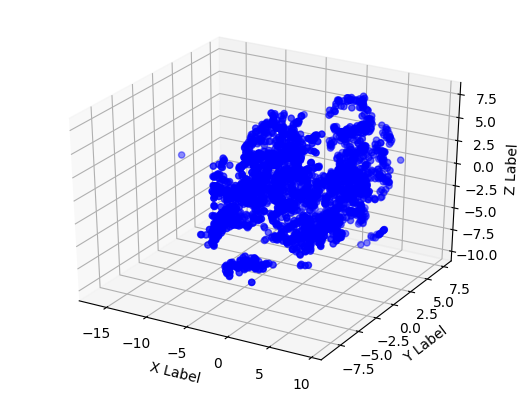

In [87]:
from mpl_toolkits.mplot3d import Axes3D

X = X_mat_red
model = TSNE(n_components=3, random_state=0)
np.set_printoptions(suppress=True)
model.fit_transform(X) 

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


ax.scatter(model.embedding_[:,0],  model.embedding_[:,1], model.embedding_[:,2], c='b')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()